# Tasks 

Before sourcing the data, all the libraries and packages required to run the notbook are imported. 

In [1]:
# import scikit-learn
import sklearn as skl

# import numpy 
import numpy as np

# import matplotlib.pyplot 
import matplotlib.pyplot as plt

# import matplotlib.lines
from matplotlib.lines import Line2D

# import pandas
import pandas as pd

[add information+ link on the iris dataset]

In [2]:
# load the dataset from scikit-learn
# see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html 
data = skl.datasets.load_iris()

 ## Task 2: Explore the Data Structure

### Explore the full dataset 

View the complete dataset, including features, target, and other metadata.

In [3]:
# show dataset
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Based on the official documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), what 'data' returns is a 'bunch', which is a dictionnary-like object with the following elements. in my own words, these are:
- **features** bidimensional array listing the 4 features of each instance in the data set. Each value is a float. 

- **target** a monodimensional array (list) with the target of each instance, expressed in integers (0, 1, 2). 

- **frame** how the data is structured (tabular format or not)

- **target_names** the string (comprehensible) names associated with the target values -- i.e. the name of the flowers (setosa, versicolor, virginica). This is also a bidimensional array, composed of a list of strings (flower names), and a value describing the data type (string: Unicode characters, longest string is less than 10 characters). My reference: https://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html. 

- **description** aa short description of the data set, including number of instances, features, classes. 

- **feature_names** monodimensional array: a list including the strings representing the 4 feature names (sepal length and width, petal length and width). 

- **file_name** name of the .csv file 

- **data_module** basically the source, sklearn.datasets. 


### View features and target

Importing the iris dataset with the iris_load() function, it is possible to output, instead of a bunch, a tuple consisting of two arrays: features and target (*return_X_y=True*). Setting the parameter *as_frame=true*, it is also possible to represent them in a tabular format, with feature names and target names on top of the columns. 

In [4]:
# Visualizing the dataset with tabular format, only features and target
data_framed = skl.datasets.load_iris(as_frame=True, return_X_y=True)

data_framed

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

TO ADD EXPLORE WITH PANDAS 

https://www.angela1c.com/projects/iris_project/investigating-the-iris-dataset/#:~:text=The%20correlation%20coefficients%20between%20measurement%20variables%3A&text=a%20strong%20positive%20correlation%20between,Iris%20Virginica%20at%20over%200.86

## Task 3: Summarize the data

### Extracting the features 

The features are extracted from the dataset and stored in the variable *features*. 
The variable is a two-dimensional array. It contains multiple arrays, one for each element (iris type) in the dataset. Every array includes 4 values (one for each feature of the dataset), in this order: 
- sepal length 
- sepal width
- petal length
- petal width

In [5]:
# variable for features
features = data.data 

# show features
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Using Numpy for mathematical operations

Numpy functions are used to calculate the following values for each feature (column) in the dataset:
- **mean**: numpy.mean
- **minimum**: numpy.min
- **maximum**: numpy.max
- **standard deviation**: numpy.std
- **median**: numpy.median

The functions take in the array name and allow to include a axis parameter, which allows to specify along which axis the values are computed, in this case column-wise. If no axis is specified, the result is the mean of the flattened arrays. 

References: 

https://numpy.org/doc/stable/reference/generated/numpy.mean.html\
https://numpy.org/doc/stable/reference/generated/numpy.max.html\
https://numpy.org/doc/stable/reference/generated/numpy.max.html\
https://numpy.org/doc/stable/reference/generated/numpy.std.html\
https://numpy.org/doc/stable/reference/generated/numpy.median.html

In [6]:
# mean 
print(f'Mean:\t\t\t{np.mean(features, axis=0)}')

# minimum
print(f'Minimum:\t\t{np.min(features, axis=0)}')

# maximum
print(f'Maximum:\t\t{np.max(features, axis=0)}')

# standard deviation
print(f'Standard Deviation:\t{np.std(features, axis=0)}')

# mean 
print(f'Median:\t\t\t{np.median(features, axis=0)}')


Mean:			[5.84333333 3.05733333 3.758      1.19933333]
Minimum:		[4.3 2.  1.  0.1]
Maximum:		[7.9 4.4 6.9 2.5]
Standard Deviation:	[0.82530129 0.43441097 1.75940407 0.75969263]
Median:			[5.8  3.   4.35 1.3 ]


**About the features**

- **mean**
- **minimum**
- **maximum**
- **standard deviation**. 

'The standard deviation is the average amount of variability in your dataset. It tells you, on average, how far each value lies from the mean.'  Pritha Bhandari, How to Calculate Standard Deviation (Guide) | Calculator & Examples, https://www.scribbr.com/statistics/standard-deviation/#:~:text=The%20standard%20deviation%20is%20the,clustered%20close%20to%20the%20mean. 

In this case, petal length is the feature that varies the most across the datasets, with a standard deviation that is two to three times that of the other features. 

- **median** 

Median is defined as the middle term of the given set of data if the data is arranged either in ascending or descending order. Source: https://www.geeksforgeeks.org/median/. 

It differs from mean because it is not necessarily the average of a set of values, only the value that is exactly in the middle. 

In this case, the mean and the median of sepal length and width are similar, while those of petal length and petal width are significantly different. 

Petal length: mean = 3.758; median = 4.35
Petal width: mean = 1.19933333; median: 1.3

## Task 4: Visualize features

In this task, plots (histograms, boxplots) are created to visualize each feature in the Iris dataset and observe feature distribution and variation. 

### Accessing each feature in the dataset

In order to plot the histogram, each feature in the features array is accessed to generate monodimensional arrays, so that they can be named and plotted individually. 


In [7]:
# Sepal length 
sepal_length = features[:,0]
# Sepal width 
sepal_width = features[:,1]
# Petal lenght
petal_length = features[:,2]
# Petal width 
petal_width = features[:,3]

In [8]:
# Uncomment any of these to verify the arrays are correct, or check how they look like. 

#sepal_length
#sepal_width
#petal_length
#petal_width

### Histograms

**Plotting features individually**

Matplotlib.pyplot was used to plot histogram for each feature individually.
In this case, a stateless approach (pyplot) was enough to be able to show all elements and differentiate them. 
About stateless vs stateful approach on Matplotlib: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/ 

*Some references on these histograms*

- matplotlib.pyplot.hist arguments https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html 
- Color names on matplotlib https://matplotlib.org/stable/gallery/color/named_colors.html 
- [TO REMOVE] RGBA colors https://www.chai3d.org/download/doc/html/chapter14-colors.html 

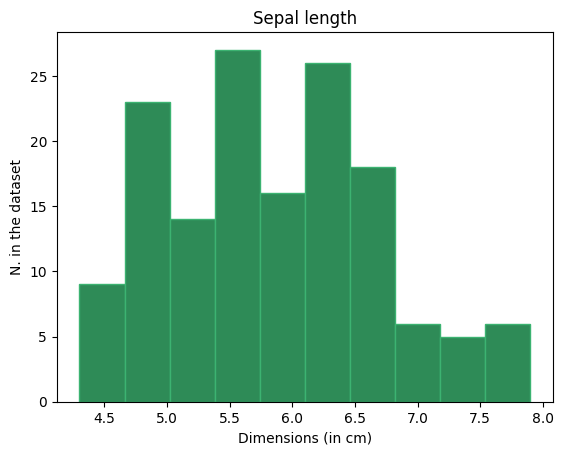

In [9]:
# Histogram for Sepal length
# color on Matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html  
plt.hist(sepal_length, color = 'seagreen', edgecolor = 'mediumseagreen')
# add labels to axes and title 
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
plt.title('Sepal length')
# show data 
plt.show()

As for sepal length, it looks like most of the samples are 4.5-6.8cm, while only few are shorter or longer than that.  

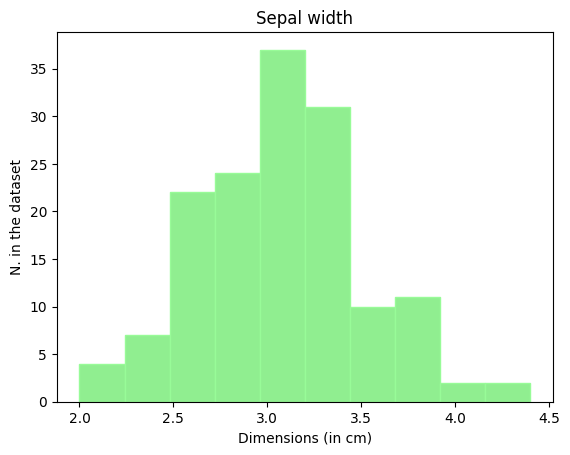

In [10]:
# Sepal width 
plt.hist(sepal_width, color = 'lightgreen', edgecolor = 'palegreen')
# Add labels and title
plt.title('Sepal width')
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
# Show 
plt.show()

As for sepal width, most of the samples are close to the median value. That means that the standard deviation is relatively low, and that only few samples are close to the minimum and maximum value. 

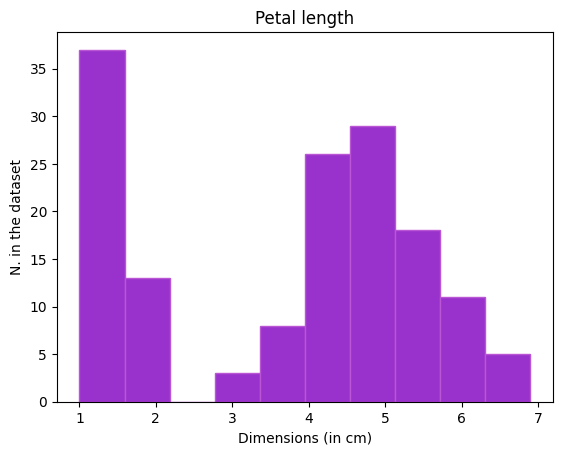

In [11]:
# Petal length
plt.hist(petal_length, color = 'darkorchid', edgecolor = 'mediumorchid')
# Add labels and title
plt.title('Petal length')
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
# Show
plt.show()

As for petal length, many samples are located at the lower end of the range, close to the minimum value. Then there is a gap, after which values increase again, to dicrease towards the maximum value. In this case, standard deviation is quite high (1.75940407, more than double than the highest std of the other samples). 

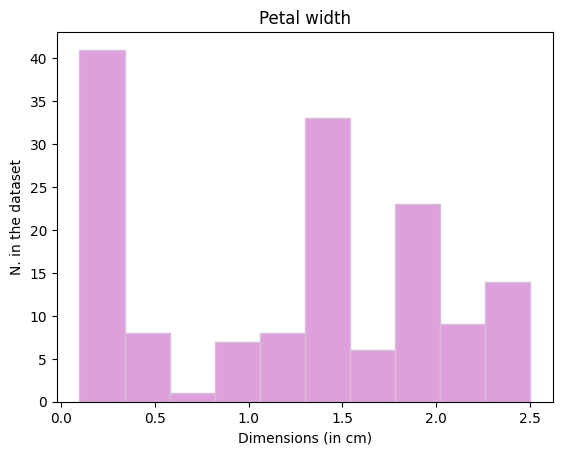

In [12]:
# Petal width 
plt.hist(petal_width, color = 'plum', edgecolor = 'thistle')
plt.title('Petal width')
plt.xlabel('Dimensions (in cm)')
plt.ylabel('N. in the dataset')
plt.show()

As for petal width, the the distribution of samples looks somehow similar to that of petal length. There is a peak at the lower end of the range, then a drop, and then an increase again. It would be interesting to visualize this in a scatter plot, to verify if a correlation exists and what that it. 

**Plotting all the features together** [TO REMOVE]

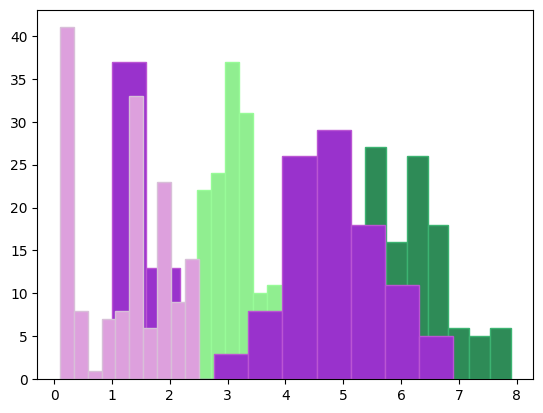

In [13]:
#set colors 
edgecolorss = ['#2E8B57','#90EE90','#9932CC','#DDA0DD']
colors = ['seagreen','lightgreen', 'darkorchid', 'plum']

# plot the histogram 
#plt.hist(features, histtype= 'step', stacked = False, label = 'Sepal length', edgecolor = edgecolorss)
#plt.hist(features, stacked = True, label = 'Sepal length', color = colors)
#plt.hist(sepal_width, histtype='step', stacked=True, label = 'Sepal width')
plt.hist(sepal_length,stacked=True, color = 'seagreen', edgecolor = 'mediumseagreen')
plt.hist(sepal_width,stacked=True, color = 'lightgreen', edgecolor = 'palegreen')
plt.hist(petal_length, color = 'darkorchid', edgecolor = 'mediumorchid')
plt.hist(petal_width, color = 'plum', edgecolor = 'thistle')
plt.show()

### Boxplots 
**Comparing feature variation**

Since visualizing features together in the same histogram was not useful, boxplots were created to show feature variation with regard to minimum, maximum, distribution, and any outliers. 

Source: https://builtin.com/data-science/boxplot#:~:text=A%20boxplot%20is%20a%20graph,in%20comparison%20to%20the%20IQR. 

In this case, a stateful (or object-oriented approach) was used to be able to leverage artist personalization whe plotting the data (in particular with colors). 

*Some references on the style of these boxplots*

- Boxplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html 

- Medianprops: https://stackoverflow.com/questions/57668399/change-the-colors-of-outline-and-median-lines-of-boxplot-in-matplotlib 

- Colors: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py

- X ticks: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks

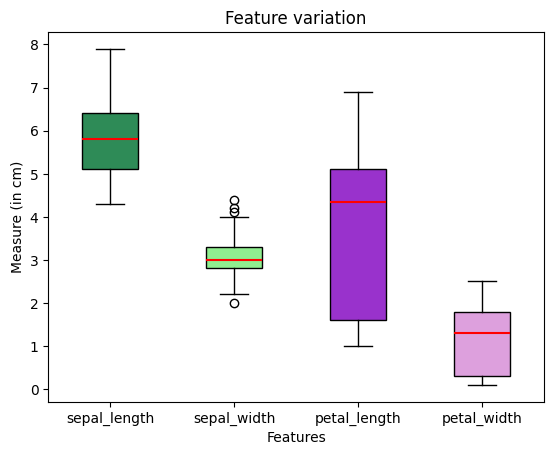

In [14]:
# create a boxplot to see variation difference in the 4 features 
# see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html 

# set labels and colors 
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
colors = ['seagreen','lightgreen', 'darkorchid', 'plum']
median_color = dict(color = 'red', linewidth = 1.5 )

# Create subplot
fig, ax = plt.subplots() 

# Plot boxplots
# Subplot includes different colors for each feature boxplot, ticks and labels for each feature 
feature_plot = ax.boxplot(features, patch_artist=True, medianprops= median_color, tick_labels=feature_names)

# assign colors to each feature boxplot 
# more here: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py
for patch, color in zip(feature_plot['boxes'], colors):
    patch.set_facecolor(color) 

# add title 
ax.set_title('Feature variation')
# add x ticks and labels for each boxplot 
# see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks
#plt.xticks([1,2,3,4], feature_names)
# add labels for axes 
ax.set_xlabel('Features')
ax.set_ylabel('Measure (in cm)')

# show plot
plt.show()

Observation: 
- sepal width has the lowest degree of variation, but also outliers at the ends. 
- petal length has the highest degree of variation, with the median value very close to the third quartile. 
- as for sepal length, it looks like first and third quartile have the same distance to median value. 

## Task 5: Investigare relationships 

In this part of the notebook, correlations between petal length and petal width are analysed and visualized with a scatter plot. 
A stateful approach is used.
About scatter plots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 

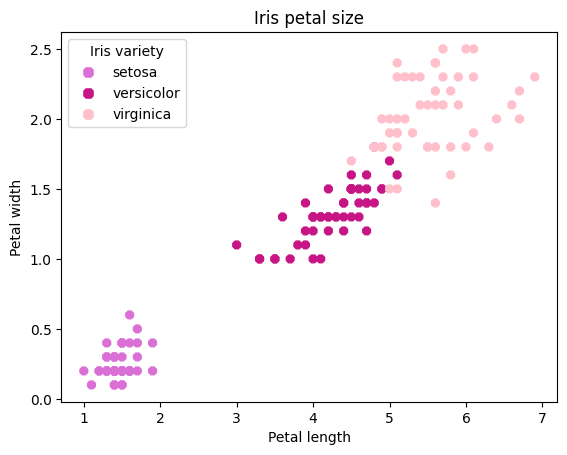

In [15]:
# get target data (class) and target name (class name) from the data set 
target_names = data.target_names
targets = data.target 

# Create the plot 
fig, ax = plt.subplots()

# Classes (target values)
# Colors https://jamesmccaffrey.wordpress.com/2020/10/22/making-a-python-scatter-plot-with-different-colors-for-different-labels/ 
colormap = np.array(['orchid', 'mediumvioletred', 'pink'])


# plot the data 
# about markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers 
plot = ax.scatter(petal_length,petal_width, c=colormap[targets], marker='8')
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.set_title('Iris petal size')

# Create custom legend using feature_names
# from chatGPT https://chatgpt.com/share/67f2c42b-a108-800f-9b47-c15d529b5264 
legend_elements = [Line2D([0], [0], marker='8', color='w', label=label,
                          markerfacecolor=color, markersize=10)
                   for label, color in zip(target_names, colormap)]
ax.legend(handles=legend_elements, loc="upper left", title="Iris variety")

plt.show()

The hypothesis formulated with the histograms is confirmed: there is a direct correlation between petal width and petal length: the longer the petal, the bugger it is. 
Also, the class coloring highlights the fact that the three different target classes are homogeneous and have consistent size dimensions, with virginica being the class with the highest degree of variation, among its samples. 

# Task 6: Analyze relationships 

In this section numpy.polyfit is used to fit a line in the scatter plot from task 6. In this way, an equation can be found to explain the correlation between petal length and petal width in the three iris species (targets of the dataset). 

About numpy.polyfit: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [16]:
# Fit a line to the data 
m , c = np.polyfit(petal_length, petal_width, 1)

# show 
m, c

(np.float64(0.41575541635241153), np.float64(-0.36307552131902887))

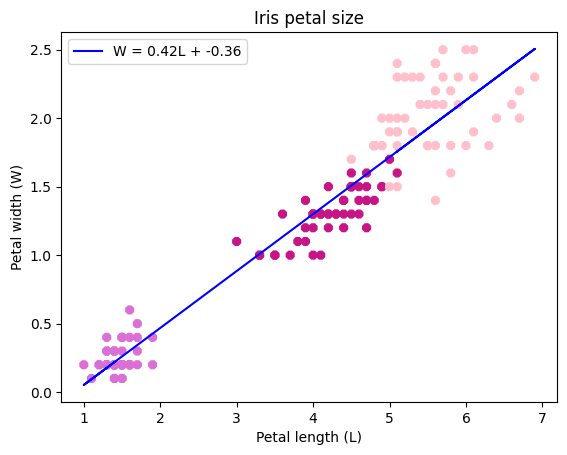

In [17]:
# Recreate the scatter plot 
fig, ax = plt.subplots()

# Classes (target values)
# Colors https://jamesmccaffrey.wordpress.com/2020/10/22/making-a-python-scatter-plot-with-different-colors-for-different-labels/ 
colormap = np.array(['orchid', 'mediumvioletred', 'pink'])


# plot the data 
# about markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers 
plot = ax.scatter(petal_length,petal_width, c=colormap[targets], marker='8')
ax.set_xlabel('Petal length (L)')
ax.set_ylabel('Petal width (W)')
ax.set_title('Iris petal size')

equation = (f'W = {m:.2f}L + {c:.2f}')

ax.plot(petal_length, m * petal_length + c, color='blue', label = equation);

ax.legend()

plt.show()

 the line is more precise in describing the trend for setosa and versicolor species, while for virginica the trend is less clear. 

# Task 7: Analyze class distribution

In this section, boxplots are used to analyse class distribution. A boxplot is created to represent the feature petal length for each target (iris species) in the dataset. 

### Creating the variables

I decided to import the dataset again from an online resource, rather than using scikit-learn function load_iris(), to make it easier for me to extract feature values and separate them according to the class. Load_iris() only allows you to see features and targets at the same time as a bunch (*data()*) or as a tuple of two arrays (*data(return_X_y = True)*). You can decide to visualize the data in a tabular form (*data(as_frame= True)*), but features and targets are still two separate arrays, which makes it harder to extract the values I am interested in. 
On the other hand, importing the dataset as a .csv file that includes all variables (features + target) allows you to uses pandas to create a dataframe and then select rows based on a given condition (value of the class series)), and from there select specific values (petal length)

References: 
- load_iris() properties https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
- Analyse the iris dataset with pandas https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/
- Select rows in pandas dataframe https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/ 

In the following code cell, the dataset is imported as a .csv format and turned it into a pandas dataframe. 

In [18]:
# import the dataset in tabular format 
data_tabular = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

# show data with tabular format (vs bunch)
data_tabular


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In the following cell, three variables are created, storing in each an array with petal_length values for each iris species. Each variable is an array of 50 values. 

In [19]:
# Create variable for sepal length 
# Select rows based a given condition (value of the series 'class') and then only select the value in the series 'petal length'
petal_setosa = data_tabular[data_tabular['species'] == 'setosa']['petal_length']
petal_versicolor = data_tabular[data_tabular['species'] == 'versicolor']['petal_length']
petal_virginica = data_tabular[data_tabular['species'] == 'virginica']['petal_length']


In [20]:
# Uncomment to see the arrays for petal lengths for each class 
#petal_setosa
#petal_versicolor
#petal_virginica

### The boxplots

In the following cell, three boxplots are created for each variable (petal_length)

About boxplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html 

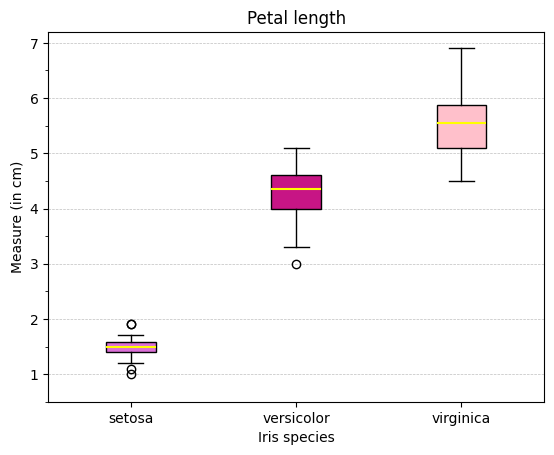

In [21]:
# Create a list for all petal length values 
petal_lengths = [petal_setosa,petal_versicolor,petal_virginica]

# Set colors and labels, ticks 
colors = ['orchid', 'mediumvioletred', 'pink'] 
median_line = dict(linewidth = 1.5, color = 'yellow' )
target_label = target_names
y_ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]

# Create subplot
fig, ax = plt.subplots() 

# Plot boxplots
# Subplot includes different colors for each feature boxplot, ticks and labels for each feature 
petal_plot = ax.boxplot(petal_lengths, patch_artist=True, medianprops= median_line, tick_labels=target_label)

# assign colors to each feature boxplot 
# more here: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py
for patch, color in zip(petal_plot['boxes'], colors):
    patch.set_facecolor(color) 

# add title 
ax.set_title('Petal length')
# add labels for axes 
ax.set_xlabel('Iris species')
ax.set_ylabel('Measure (in cm)')
# add minor ticks to y ax. reference:  https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticks.html 
ax.set_yticks(y_ticks,minor=True)
# add grid to y ax. Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html
ax.grid(axis='y',color='grey', linestyle='--', linewidth=0.5, alpha = 0.5)

# show plot
plt.show()

petal_plot = ax.boxplot(petal_lengths)

### About the boxplots

The trend looks similar to that displayed in task 5, the scatter plot analyzing the correlation of sepal lenght and width. However, in that case, petal length dimensions were plotted on the x ax, while in this case they are on the y ax. 

**Setosa**

With regard to petal length, the setosa species has a **lower degree of variation** -- min and max are roughly included in the interval 1-2cm, and the values between the quartiles in a even narrrower interval (1.4-1.6cm). Compared to the other iris species, there is also a high number of outliers, i.e. values that are significantly above or below the normal range of the data. See code cell below.

About quartiles and calculating quartiles with numpy: https://numpy.org/doc/stable/reference/generated/numpy.quantile.html


In [22]:
# Max, min, and quartiles (1st quartile, median, 3rd quartile)
petal_setosa_min = np.min(petal_setosa)
petal_setosa_max = np.max(petal_setosa)
petal_setosa_median = np.median(petal_setosa)
petal_setosa_1_quantile = np.quantile(petal_setosa, 0.25)
petal_setosa_3_quantile = np.quantile(petal_setosa, 0.75)

print('Setosa petal length')
print(f'Min:\t{petal_setosa_min}\tMax:\t{petal_setosa_max}')
print(f'1st q.:\t{petal_setosa_1_quantile}\tMedian:\t{petal_setosa_median}\t3rd q.:{petal_setosa_3_quantile}')



Setosa petal length
Min:	1.0	Max:	1.9
1st q.:	1.4	Median:	1.5	3rd q.:1.5750000000000002


**Versicolor**

The versicolor species has a higher degree of variation, in particular below the first quartile (minimum value is 3cm, 1st. quartile is 4cm). The minimum number is an outlier, located well below the lower whisker. The distance between minimum and median value is higher than that between median value and maximum (min: 3, median: 4.35, max: 5.1). See complete numbers in the cell code below.


In [23]:
# Max, min, and quartiles (1st quartile, median, 3rd quartile)
petal_versicolor_min = np.min(petal_versicolor)
petal_versicolor_max = np.max(petal_versicolor)
petal_versicolor_median = np.median(petal_versicolor)
petal_versicolor_1_quartile = np.quantile(petal_versicolor, 0.25)
petal_versicolor_3_quartile = np.quantile(petal_versicolor, 0.75)

print('Versicolor petal length')
print(f'Min:\t{petal_versicolor_min}\tMax:\t{petal_versicolor_max}\t')
print(f'1st q.:\t{petal_versicolor_1_quartile}\tMedian:\t{petal_versicolor_median}\t3rd q.:\t{petal_versicolor_3_quartile}')

Versicolor petal length
Min:	3.0	Max:	5.1	
1st q.:	4.0	Median:	4.35	3rd q.:	4.6


**Virginica**

As for the Virginica species, the trend looks opposite to that of Iris Versicolor. As for Versicolor, the degree of variation is quite high, with long whiskers, and the higher whisker being longer than the the interval between first and third quartile. In this case, however, the maximum is further away from the median value (min: 4.5, median: 5.55, max: 6.9). 

In [24]:
# Max, min, and quartiles (1st quartile, median, 3rd quartile)
petal_virginica_min = np.min(petal_virginica)
petal_virginica_max = np.max(petal_virginica)
petal_virginica_median = np.median(petal_virginica)
petal_virginica_1_quartile = np.quantile(petal_virginica, 0.25)
petal_virginica_3_quartile = np.quantile(petal_virginica, 0.75)

print('Virginica petal length')
print(f'Min:\t{petal_virginica_min}\tMax:\t{petal_virginica_max}\t')
print(f'1st q.:\t{petal_virginica_1_quartile}\tMedian:\t{petal_versicolor_median}\t3rd q.:\t{petal_virginica_3_quartile}')

Virginica petal length
Min:	4.5	Max:	6.9	
1st q.:	5.1	Median:	4.35	3rd q.:	5.875


## Task 8: Compute correlations 

### About correlations


In this section, the Pearson's correlation coefficient is calculated for all the features. 

A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables. In other words, it reflects how similar the measurements of two or more variables are across a dataset. (source: [scribbr.com](https://www.scribbr.com/statistics/correlation-coefficient/#:~:text=A%20correlation%20coefficient%20is%20a,variables%20are%20across%20a%20dataset)). In particular: 
- a correlation between 0 and 1, is a **positive correlation**. This means that y values increase, when x values increase. A correlation of 1 is a perfect positive linear relationship. 
- a correlation o 0 means that there is **no correlation** between the features.
- correlation between 0 and -1 is a **negative correlation**. It means that when x values increase, y values decrease. A correlation of -1 is a perfect negative linear relationship. 



### Correlation coefficients

Correlation coefficients can be calculated in multiple ways, using NumPy, SciPy, or Pandas (Source: [Real Python](https://realpython.com/numpy-scipy-pandas-correlation-python/#heatmaps-of-correlation-matrices) ). In this case, NumPy's function numpy.corrcoef() is used (Source: [NumPY documentation](https://numpy.org/doc/2.2/reference/generated/numpy.corrcoef.html)). With Numpy.corrcoef(), it is possible to provide as paramteres 1-D or 2-D arrays, and calculate the correlation between more than two sets of values at the same time. In this case, correlation coefficients are calculated for all four feartures at the same time: The x value is a numpy 2-D array where each feature is a column of values. 

In [224]:
# calculate correlation coefficients. The parameter rowvar=False is set, so that each column represent a feature. 
# Numbers are rounded to 2 decimal points, to make them easier to read and use in the heatmap 
correlation = np.corrcoef(features, rowvar=False).round(decimals=2)

print('Correlation coefficients\n')
print('\t\tSepal length\tSepal width\tPetal length\tPetal width')
print(f'Sepal length\t{correlation[0,0]}\t\t{correlation[0,1]}\t\t{correlation[0,2]}\t\t{correlation[0,3]}')
print(f'Sepal width\t{correlation[1,0]}\t\t{correlation[1,1]}\t\t{correlation[1,2]}\t\t{correlation[1,3]}')
print(f'Petal length\t{correlation[2,0]}\t\t{correlation[2,1]}\t\t{correlation[2,2]}\t\t{correlation[2,3]}')
print(f'Petal width\t{correlation[3,0]}\t\t{correlation[3,1]}\t\t{correlation[3,2]}\t\t{correlation[3,3]}')


Correlation coefficients

		Sepal length	Sepal width	Petal length	Petal width
Sepal length	1.0		-0.12		0.87		0.82
Sepal width	-0.12		1.0		-0.43		-0.37
Petal length	0.87		-0.43		1.0		0.96
Petal width	0.82		-0.37		0.96		1.0


### Heatmap 

The matrix calculated with NumPy is now used to plot a heatmap showing the correlation relationship between each feature in the dataset. 

In [225]:
# Pepare labels 
feature_labels = []
for name in feature_names:
    feature_label = name.replace('_',' ').capitalize()
    feature_labels.append(feature_label)

feature_labels

['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

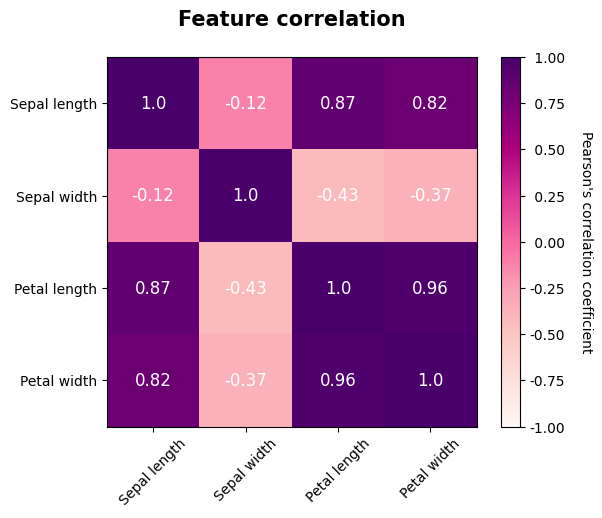

In [293]:
# Create subplot and plot 
# About colormaps https://matplotlib.org/stable/users/explain/colors/colormaps.html#sphx-glr-users-explain-colors-colormaps-py
fig, ax = plt.subplots()
im = ax.imshow(correlation, vmin= -1, vmax = 1, cmap = 'RdPu')

# Personalize the plot 
ax.grid(False)
# add feature names as tick labels
ax.set_xticks(range(len(feature_names)),labels=feature_labels, rotation = 45)
ax.set_yticks(range(len(feature_names)),labels=feature_labels)
ax.set_title('Feature correlation\n',fontsize = 15, weight = 'bold')

# create a for loop to add coefficient to each cell in the plot 
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax.text(j, i, correlation[i, j],
                       ha="center", va="center", color="white", fontsize = 12)
        
# add colorbar. Reference: https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation 
cbar = ax.figure.colorbar(im, ax= ax, format='% .2f')
cbar.set_label("Pearson's correlation coefficient", rotation=270, labelpad=20)

# show
plt.show()


Other sources: 
-  https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
- https://www.angela1c.com/projects/iris_project/investigating-the-iris-dataset/#:~:text=The%20correlation%20coefficients%20between%20measurement%20variables%3A&text=a%20strong%20positive%20correlation%20between,Iris%20Virginica%20at%20over%200.86

### About the heatmap 

Looking at the hepmap, the following points can be made: 
- **Sepal length, Petal length and Petal width** have a positive correlation. The scatter plot on Petal length vs Petal width (task 5) had already highlighted a direct and positive correlation between these two features, but the heatmap shows that there is clear correlation between sepal length and petal length/petal width, as well. 
- **Sepal width** is the only feature to have a negative correlation with the other features. It looks like the bigger the petal is, and longer the sepal, the thinner the sepal width is. 

## End